In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pangolin
from pangolin import interface as pi

In [2]:
# parameters
length = 500
transition_noise = 0.1
obs_noise = 1.0

In [3]:
# simulate data (no pangolin)
x_true = []
y_true = []
x_last = 0
for i in range(length):
    x_true.append(x_last + transition_noise * np.random.randn())
    x_last = x_true[-1]
    y_true.append(x_last + obs_noise * np.random.randn())

x_true = np.array(x_true)
y_true = np.array(y_true)

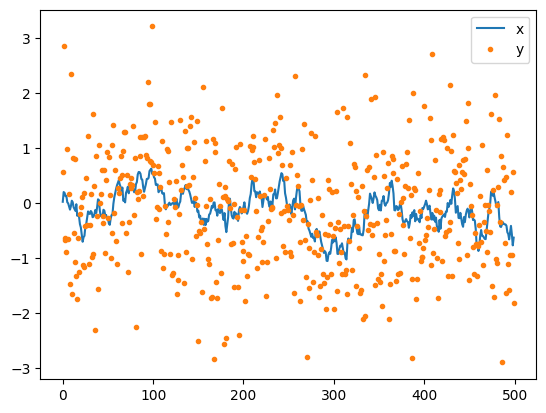

In [4]:
# plot simulated data (still no pangolin)
plt.plot(x_true,label='x')
plt.plot(y_true,'.',label='y')
plt.legend();

In [5]:
# define the probabilistic model (pangolin)
x0 = pi.constant(0.5)
noise = pi.constant(transition_noise)
x = pi.autoregressive(lambda last: pi.normal(last, noise), length)(x0)
y = pi.vmap(pi.normal,[0,None])(x,obs_noise)

In [6]:
# print the IR (pangolin)
pi.print_upstream(y)

shape  | statement
------ | ---------
()     | a = 0.5
()     | b = 0.1
(500,) | c ~ autoregressive(composite(2, (normal,), ((0, 1),)), 500, (None,), 0)(a,b)
()     | d = 1.
(500,) | e ~ vmap(normal, (0, None), 500)(c,d)


In [7]:
# do inference (pangolin)
samps = pangolin.blackjax.sample(x,y,y_true)

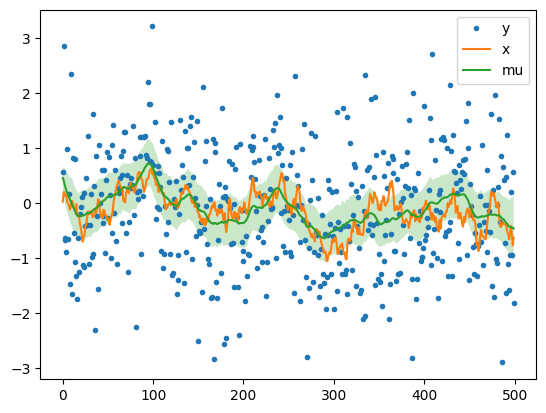

In [8]:
# plot posterior mean and 95% credible interval (no pangolin)
mu = np.mean(samps,axis=0)
lo = np.percentile(samps,2.5,axis=0)
hi = np.percentile(samps,97.5,axis=0)

plt.plot(y_true,'.',label='y')
plt.plot(x_true,label='x')
l = plt.plot(mu,label='mu')
plt.fill_between(np.arange(len(lo)),lo,hi,color=l[0].get_color(),edgecolor='none',alpha=0.25)
plt.legend();